In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pysolo.consumers import Solo
from pysolo.core.models.solo import BoundingBox2DAnnotationDefinition
import numpy as np

## Initialize Stats

In [2]:
dataset_path = "data/solo"
solo = Solo(dataset_path)
stats = solo.stats

## Get Metadata

In [11]:
print(f"Unity Version: {stats.metadata.unityVersion}")
print(f"Total frames in the dataset: {stats.metadata.totalFrames}")

Unity Version: 2020.3.34f1
Total frames in the dataset: 1000


#### Categories

In [12]:
stats.get_categories()

{1: 'Crate', 2: 'Cube', 3: 'Box', 4: 'Terrain', 5: 'Character'}

## Statistics

### Number of bouding box

In [13]:
num_bbox = stats.get_num_bbox()
print(f"Total number of bouding boxes: {num_bbox}")

DONE (t=0.00000s)
Total number of bouding boxes: 3000


#### Number of bounding box by category

In [14]:
cat_id = 1
num_bbox = stats.get_num_bbox(cat_ids=[cat_id])
print(f"Total number of bouding boxes of category [{cat_id}]: {num_bbox}")

DONE (t=0.00000s)
Total number of bouding boxes of category [1]: 2000


In [15]:
cat_id = 5
num_bbox = stats.get_num_bbox(cat_ids=[cat_id])
print(f"Total number of bouding boxes of category [{cat_id}]: {num_bbox}")

DONE (t=0.00000s)
Total number of bouding boxes of category [5]: 1000


### BBox per Image Distribution

In [16]:
bbox_dist = stats.get_bbox_per_img_dist()

DONE (t=0.00000s)


In [17]:
bbox_dist

{3: 1000}

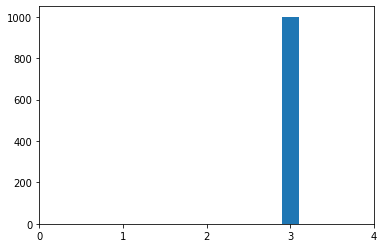

In [18]:
x, y = bbox_dist.keys(), bbox_dist.values()
fig, ax = plt.subplots(1, 1)
ax.bar(x, y, width=0.2)
ax.set_xlim(1, 4)
plt.xticks([0,1,2,3,4])
plt.show()

### BBox Heatmap

In [19]:
bbox_hm = stats.get_bbox_heatmap()

DONE (t=0.00000s)


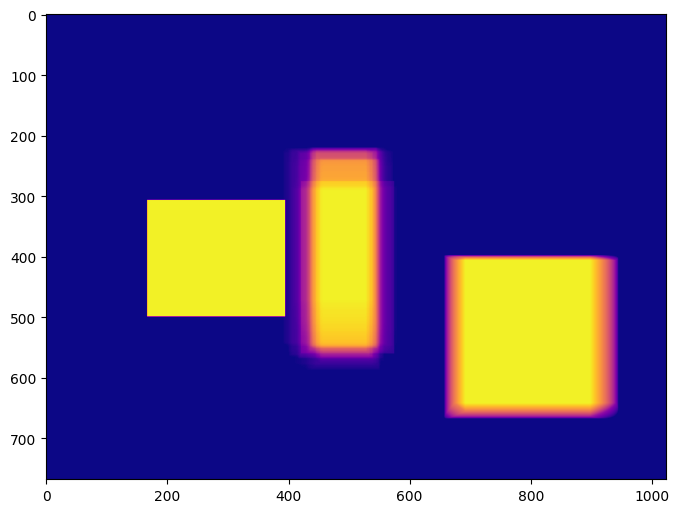

In [20]:
bbox_heatmap_norm = bbox_hm / bbox_hm.max()
fig, ax = plt.subplots(dpi=100, figsize=(8,8))
pcm = ax.imshow(bbox_heatmap_norm[:,:,0], cmap="plasma", )
plt.show()

#### Heatmap by category

In [21]:
bbox_hm = stats.get_bbox_heatmap(cat_ids=[5])

DONE (t=0.00000s)


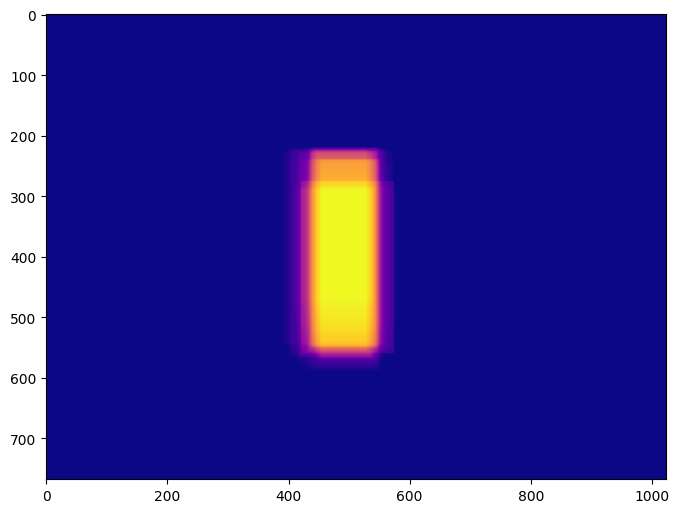

In [22]:
bbox_heatmap_norm = bbox_hm / bbox_hm.max()
fig, ax = plt.subplots(dpi=100, figsize=(8,8))
pcm = ax.imshow(bbox_heatmap_norm[:,:,0], cmap="plasma", )
plt.show()

### BBox Size Distribution

In [23]:
size_dist = stats.get_bbox_size_dist()

DONE (t=0.00000s)


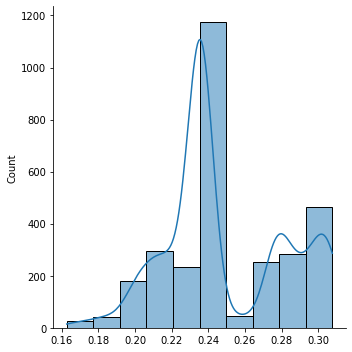

In [24]:
sns.displot(size_dist, bins=10, kde=True)


#### BBox Size distribution by category

In [25]:
size_dist = stats.get_bbox_size_dist(cat_ids=[5])

DONE (t=0.00000s)


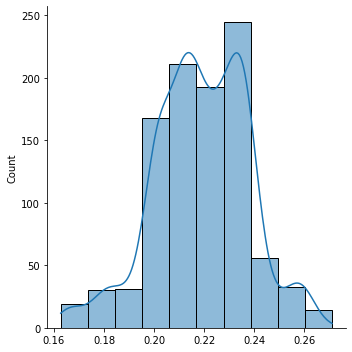

In [26]:
sns.displot(size_dist, bins=10, kde=True)

## Image Analysis Statistics


### Wavelet Transform

In [4]:

horizontal_coeff, vertical_coeff, diagonal_coeff = stats.get_wt_coeffs_var()


DONE (t=0.00000s)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


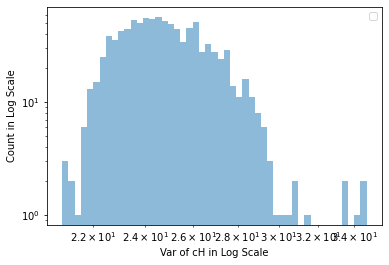

In [7]:
plt.hist(horizontal_coeff, bins=np.logspace(np.log10(min(horizontal_coeff)), np.log10(max(horizontal_coeff))), label='', alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Var of cH in Log Scale")
plt.ylabel("Count in Log Scale")
plt.legend(loc='best')
plt.show()

### Spectrum Analysis

In [3]:
avg_psd_1d, std_psd_1d = stats.get_average_psd_1d()

DONE (t=0.00000s)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.37it/s]


(1, 515.6543819492032)

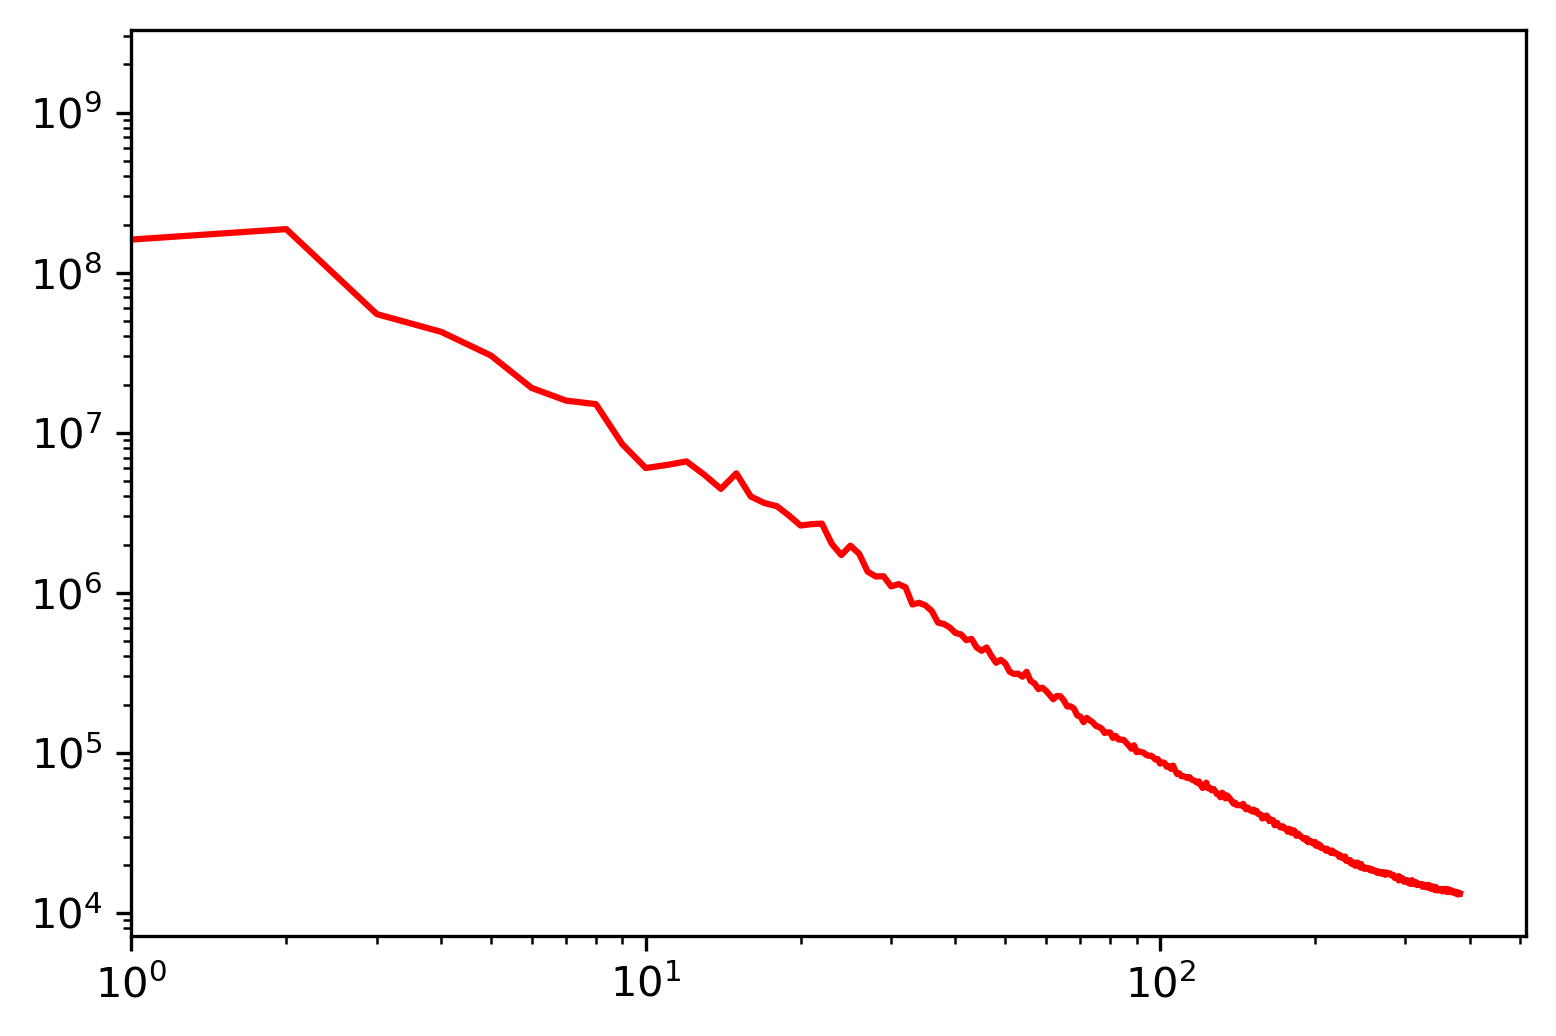

In [4]:
fig, ax = plt.subplots(dpi=300)
ax.plot(avg_psd_1d, color="red", label="PSD")
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim([1, None])

### Variance of Laplacian

In [3]:
bg_vars, fg_vars = stats.get_var_laplacian()

DONE (t=0.00000s)


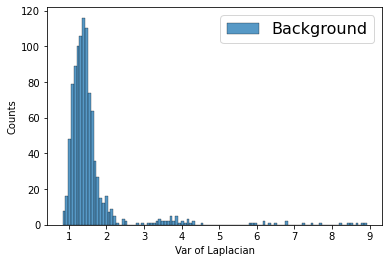

In [9]:
sns.histplot(bg_vars, kde = False,
             kde_kws = {'linewidth': 3},
             label = "Background")
plt.legend(prop={'size': 16}, title = '')
plt.xlabel('Var of Laplacian')
plt.ylabel('Counts')
plt.show()

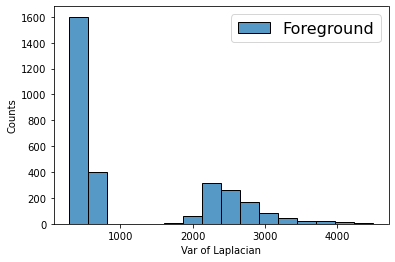

In [10]:
sns.histplot(fg_vars, kde = False,
             kde_kws = {'linewidth': 3},
             label = "Foreground")
plt.legend(prop={'size': 16}, title = '')
plt.xlabel('Var of Laplacian')
plt.ylabel('Counts')
plt.show()
